In [1]:
import random

import matplotlib.pyplot as plt
import torch.optim as optim

from dataset import *
from models import *

TEST_STEP = 4

trainset = IMPAXDataset('/shares/Public/IMPAX/train')
testset  = IMPAXDataset('/shares/Public/IMPAX/train')

# print(len(trainset))
# exit()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=TEST_STEP,
                                          shuffle=True, num_workers=2)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = N90().to(device)

# criterion = nn.MSELoss(reduction='sum')
criterion = nn.MSELoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

optimizer = optim.Adam(net.parameters(), lr=0.01)


# for epoch in range(3):   # 训练所有!整套!数据 3 次
#     for step, (batch_x, batch_y) in enumerate(trainloader):  # 每一步 loader 释放一小批数据用来学习
#         # 假设这里就是你训练的地方...

#         # 打出来一些数据
#         print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
#               batch_x.numpy(), '| batch y: ', batch_y.numpy())
# exit()


for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # print(inputs[0])
        # print(labels[0])
        # exit()
        # print(inputs)
        # break
        # # continue

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss))

print('Finished Training')


[1,    23] loss: 20962.588
[2,    23] loss: 5299.285
[3,    23] loss: 3746.179
[4,    23] loss: 3133.387
[5,    23] loss: 3026.136
[6,    23] loss: 2714.172
[7,    23] loss: 2451.235
[8,    23] loss: 2314.406
[9,    23] loss: 2621.939
[10,    23] loss: 2520.008
[11,    23] loss: 2269.186
[12,    23] loss: 2110.618
[13,    23] loss: 2268.559
[14,    23] loss: 2196.927
[15,    23] loss: 2362.194
[16,    23] loss: 2588.966
[17,    23] loss: 2107.856
[18,    23] loss: 2017.883
[19,    23] loss: 2223.861
[20,    23] loss: 1975.168
Finished Training


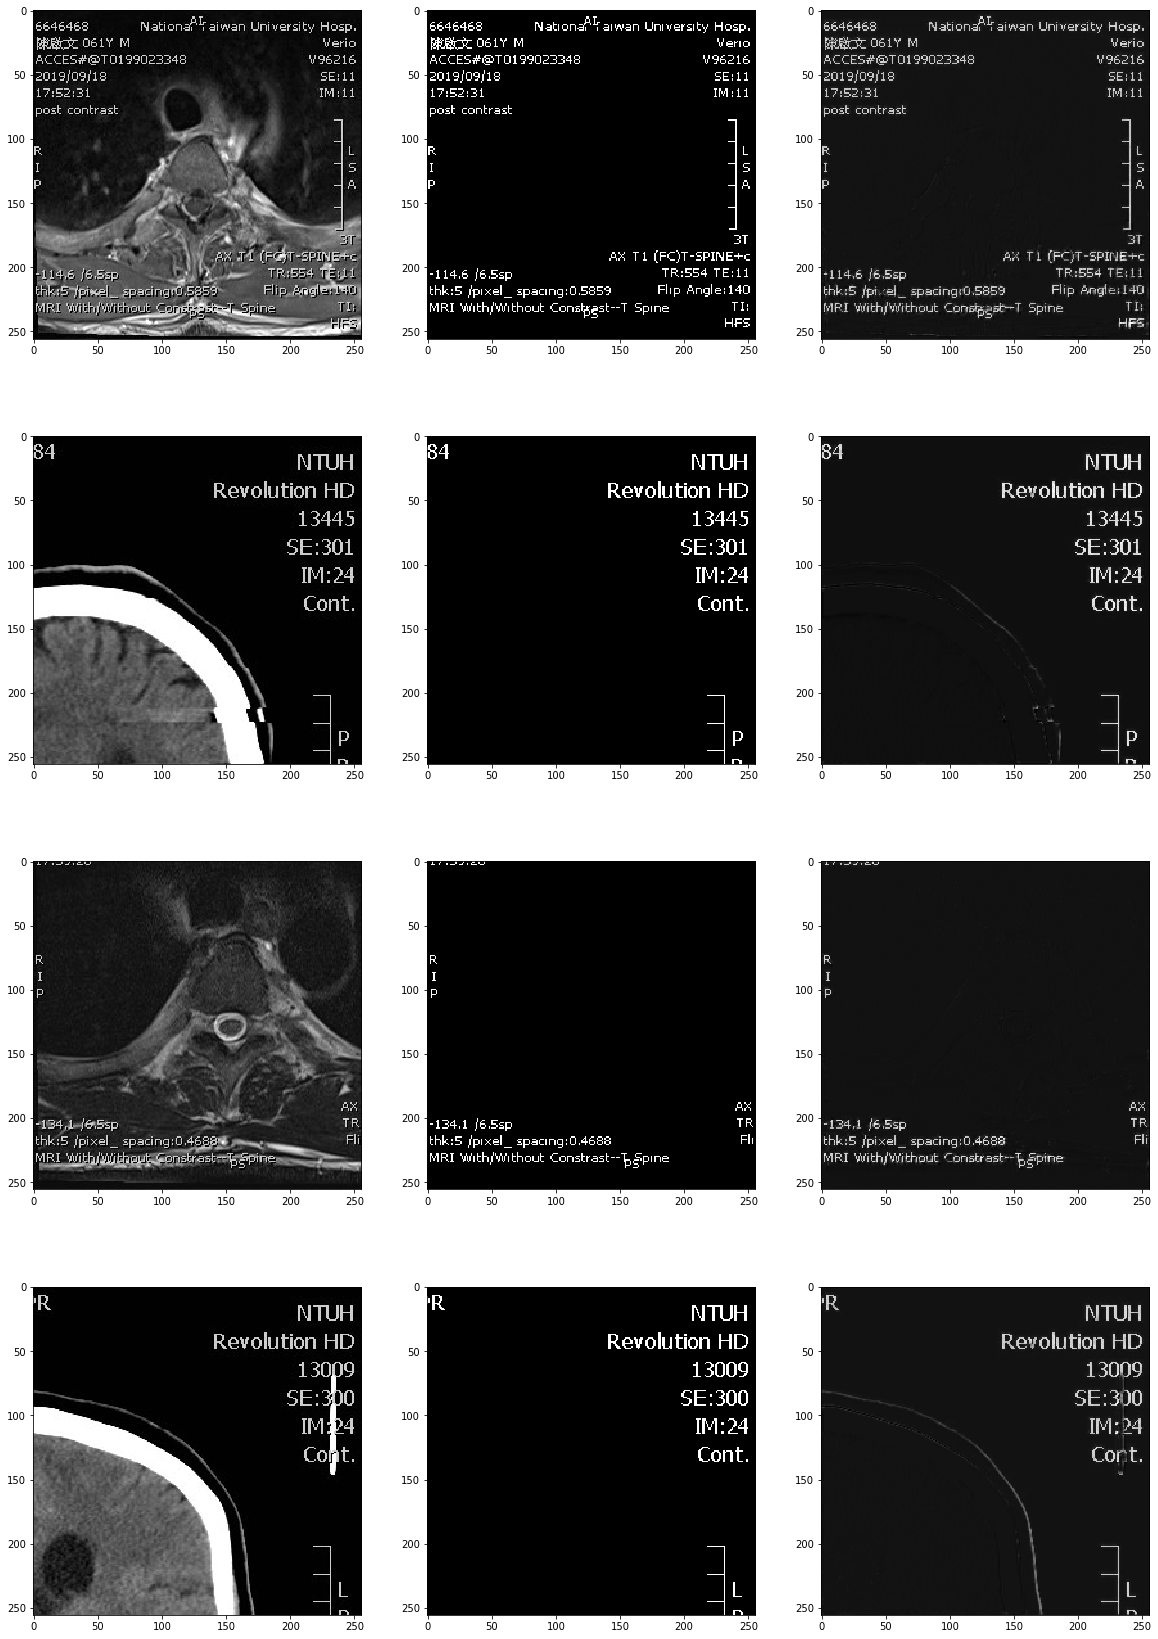

In [3]:
plt.rcParams['figure.figsize'] = [20, 30]

# dataiter = iter(testloader)
dataiter = iter(trainloader)
images, labels = dataiter.next()
output = net(images.to(device))

for j in range(TEST_STEP):
    plt.subplot(TEST_STEP,3,j*3+1)
    plt.imshow(images[j][0,:,:], cmap='gray')
    plt.subplot(TEST_STEP,3,j*3+2)
    plt.imshow(labels[j][0,:,:], cmap='gray')
    plt.subplot(TEST_STEP,3,j*3+3)
    out = output[j]
#     print(out)
    plt.imshow(out[0,:,:].cpu().detach().numpy(), cmap='gray')
plt.show()
